[![Notebook Tutorial](__code/__all/notebook_tutorial.png)](https://neutronimaging.ornl.gov/ct-reconstruction/)

<img src='__docs/notebook_rules.png' />

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
# %matplotlib notebook
# %matplotlib ipympl
# %matplotlib inline

import imars3d
print(f"Using imars3d version {imars3d.__version__}")

from __code.imars3dui import Imars3dui
from __code.roi_selection_ui import Interface

from __code import system
system.System.select_working_dir()
from __code.__all import custom_style
custom_style.style()

Using imars3d version 1.1.4


** Using Debugging Mode! **


# Select input data 

In [2]:
from __code.imars3dui import DataType
import os

# TESTING

#top_folder = "/Volumes/JeanHardDrive/HFIR/CG1D/IPTS-24863-test-imars3d-notebook/raw/"
# raw_data = top_folder + "ct_scans/Feb04_2020_half_set"

top_folder = "/Users/j35/HFIR/CG1D/IPTS-24863-test-imars3d-notebook/raw/"
raw_data = top_folder + "ct_scans/Feb04_2020"

assert os.path.exists(raw_data)
ob_data = top_folder + "/ob/Feb04_2020"
assert os.path.exists(ob_data)
dc_data = top_folder + "/dc/Feb06_2020"
assert os.path.exists(dc_data)

## raw data

In [3]:
o_imars3dui = Imars3dui(working_dir=system.System.get_working_dir())
# o_imars3dui.select_raw()

# debugging
o_imars3dui.current_data_type = DataType.raw
o_imars3dui.data_selected(raw_data)

raw folder selected: ['/Users/j35/HFIR/CG1D/IPTS-24863-test-imars3d-notebook/raw/ct_scans/Feb04_2020'] with 1165 files)


## ob 

In [4]:
# o_imars3dui.select_ob()
o_imars3dui.current_data_type = DataType.ob
o_imars3dui.data_selected([ob_data])

ob folder selected: ['/Users/j35/HFIR/CG1D/IPTS-24863-test-imars3d-notebook/raw/ob/Feb04_2020'] with 10 files)


## dc 

In [5]:
# o_imars3dui.select_dc()
o_imars3dui.current_data_type = DataType.dc
o_imars3dui.data_selected([dc_data])

dc folder selected: ['/Users/j35/HFIR/CG1D/IPTS-24863-test-imars3d-notebook/raw/dc/Feb06_2020'] with 10 files)


# Load

ct:   0%|          | 0/1165 [00:00<?, ?it/s]

ob:   0%|          | 0/10 [00:00<?, ?it/s]

dc:   0%|          | 0/10 [00:00<?, ?it/s]

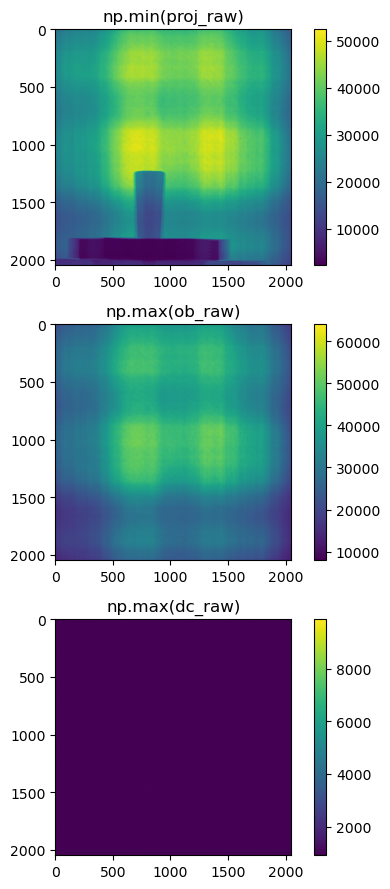

In [6]:
o_imars3dui.load_and_display_data()

# Crop

### select crop region

In [7]:
o_imars3dui.crop_embedded()

interactive(children=(IntSlider(value=50, description='left', max=2047), IntSlider(value=1550, continuous_upda…

### perform cropping 

In [8]:
o_imars3dui.perform_embedded_cropping()

Running crop ...
cropping done!


# Gamma filtering  (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

In [9]:
o_imars3dui.gamma_filtering_options()

Checkbox(value=False, description='Gamma filtering')

In [10]:
o_imars3dui.gamma_filtering()

Gamma filtering skipped!


# Normalization (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

Running normalization ...
normalization done in 7.39s


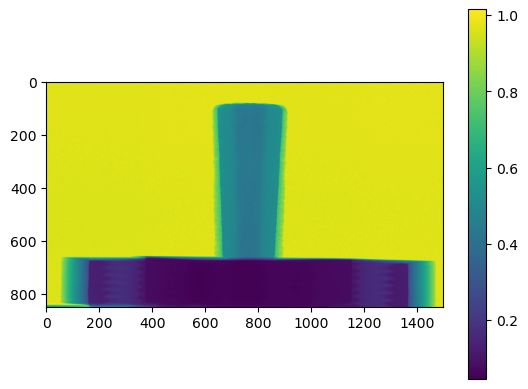

In [11]:
o_imars3dui.normalization_and_display()

# Beam fluctuation correction

### Select a region that does not contain the sample to improve the normalization

In [12]:
o_imars3dui.beam_fluctuation_correction_option()

Checkbox(value=False, description='Beam fluctuation correction')

### select beam fluctuation region

In [13]:
o_imars3dui.apply_select_beam_fluctuation()

### perform beam fluctuation correction

In [14]:
o_imars3dui.beam_fluctuation_correction_embedded()

# Transmission to attenuation

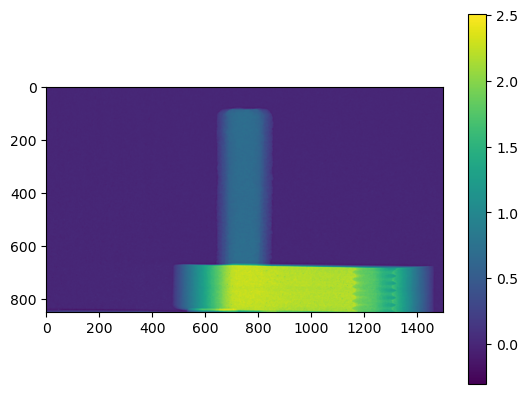

In [15]:
o_imars3dui.minus_log_and_display()

# Tilt correction (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

## find 0 and 180 degrees files

In [16]:
o_imars3dui.find_0_180_degrees_files()

## calculate tilt 

In [17]:
o_imars3dui.calculate_tilt()

### Slices to use to test tilt calculation 

In [18]:
o_imars3dui.test_tilt_slices_selection()

interactive(children=(IntSlider(value=103, description='slice1', max=849), IntSlider(value=602, description='s…

### testing tilt on selected algorithms

In [19]:
o_imars3dui.testing_tilt_on_selected_algorithms()

IntProgress(value=0, description='Progress:', max=5)

INFO:imars3d.backend.diagnostics.tilt:Executing Filter: Tilt correction
INFO:imars3d.backend.diagnostics.tilt:3D array detected, applying tilt correction with tilt = -0.520 deg


Running direct minimization ... 

Applying tilt corr:   0%|          | 0/1165 [00:00<?, ?it/s]

INFO:imars3d.backend.diagnostics.rotation:Executing Filter: Find Rotation Center
INFO:imars3d.backend.util.functions:Due to system load, setting maximum workers to 7
INFO:imars3d.backend.diagnostics.rotation:Using all pairs of angles


Done!


Finding rotation center:   0%|          | 0/1169 [00:00<?, ?it/s]

INFO:imars3d.backend.diagnostics.rotation:FINISHED Executing Filter: Find Rotation Center


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


interactive(children=(ToggleButtons(description='Algorithm:', disabled=True, options=('direct minimization',),…

## apply tilt correction

INFO:imars3d.backend.diagnostics.tilt:Executing Filter: Tilt correction
INFO:imars3d.backend.diagnostics.tilt:3D array detected, applying tilt correction with tilt = -0.520 deg


Applying tilt correction using -0.520 ...


Applying tilt corr:   0%|          | 0/582 [00:00<?, ?it/s]

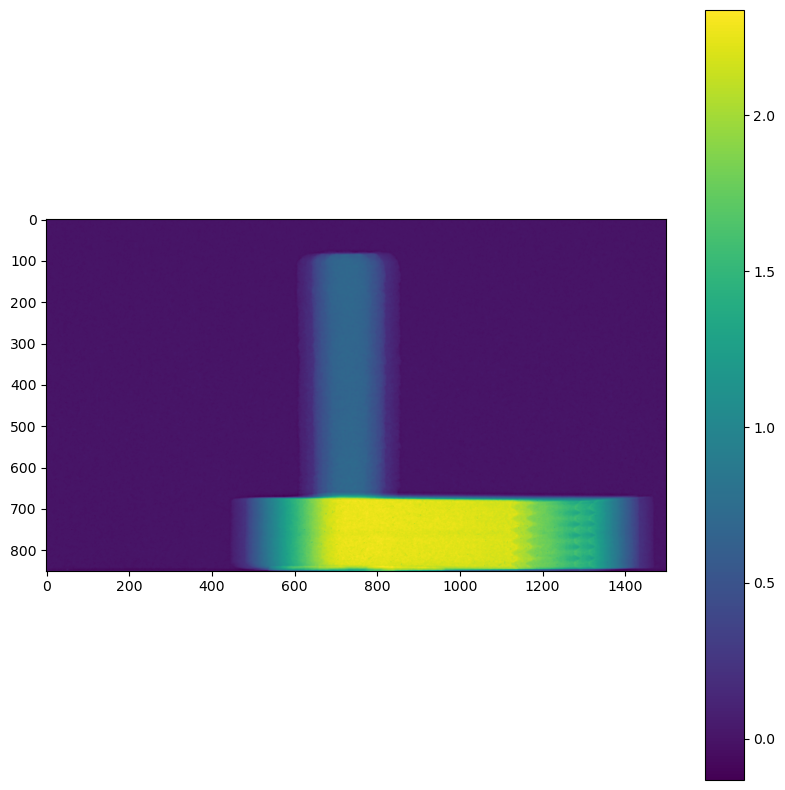

In [19]:
o_imars3dui.apply_tilt_and_display()

# Filtering

* strikes removal (Zzz) - using ketcham method on 3D stack
* remove negative values

In [21]:
o_imars3dui.filter_options()

Checkbox(value=False, description='Strikes removal', disabled=True)

Checkbox(value=False, description='Remove negative values')

In [22]:
o_imars3dui.apply_filter_options()

 Skipped strikes removal!
 Skipped remove negative values!


# Display sinogram 

In [23]:
o_imars3dui.display_sinogram()

interactive(children=(IntSlider(value=0, description='index', max=850), Output()), _dom_classes=('widget-inter…

# Rotation center (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

In [24]:
o_imars3dui.rotation_center()

INFO:imars3d.backend.diagnostics.rotation:Executing Filter: Find Rotation Center
INFO:imars3d.backend.util.functions:Due to system load, setting maximum workers to 7
INFO:imars3d.backend.diagnostics.rotation:Using all pairs of angles


Running rotation center ...


Finding rotation center:   0%|          | 0/3 [00:00<?, ?it/s]

INFO:imars3d.backend.diagnostics.rotation:FINISHED Executing Filter: Find Rotation Center


rotation center found in 1.43s
 - value: (767.5,)


# Testing reconstruction on some slides

In [25]:
o_imars3dui.define_slices_to_test_reconstruction()

interactive(children=(IntsInput(value=[170, 340, 510, 680], description='list_slices', max=849, min=0), Output…

In [26]:
o_imars3dui.test_reconstruction()

interactive(children=(IntSlider(value=0, description='slice_index', max=3), Output()), _dom_classes=('widget-i…

# Ring removal

## select and apply 

In [27]:
o_imars3dui.ring_removal_options()

In [28]:
o_imars3dui.apply_ring_removal_options()

No strikes removal using BM3D
No strikes removal using Vo
No strikes removal using Ketcham


## test ring removal

In [29]:
o_imars3dui.test_ring_removal()

interactive(children=(IntSlider(value=0, description='index', max=850), Output()), _dom_classes=('widget-inter…

# Reconstruction 

In [ ]:
o_imars3dui.testing_reconstruction_algorithm()

In [31]:
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display
from IPython.core.display import HTML

INFO:imars3d.backend.reconstruction:Executing Filter: Reconstruction


Running reconstruction ...


INFO:imars3d.backend.reconstruction:FINISHED Executing Filter: Reconstruction: hann


 reconstruction done!
time= 7.84s


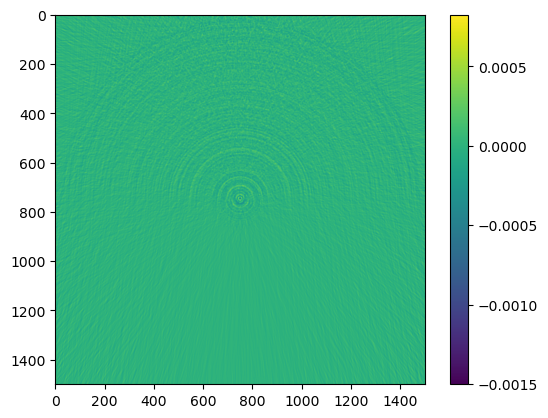

interactive(children=(IntSlider(value=0, description='index', max=850), Output()), _dom_classes=('widget-inter…

In [30]:
o_imars3dui.reconstruction_and_display()

# Export


In [ ]:
o_imars3dui.export()